# Introdução

Métricas para Algoritmos de Classificação:

* Acurácia	
* Precisão
* Sensibilidade
* Especificidade
* F1- Score
* KS

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from scipy.stats import ks_2samp
from sklearn.metrics import roc_curve, auc

In [3]:
diabetes_data = load_breast_cancer()

# Separamos en X e y
X = diabetes_data.data
y = diabetes_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

classifier = RandomForestClassifier(random_state=18)
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

Train Data: (455, 30), (455,)
Train Data: (114, 30), (114,)


# Acurácia

In [4]:
# Acurácia
acur = accuracy_score(y_test, predictions)
print(f"Accuracy of the classifier is: {acur}")

Accuracy of the classifier is: 0.9473684210526315


# Matriz de confusão

**Lembrando**

* VP: Classificação correta da classe Positiva
* FN (Erro Tipo II): erro em que o modelo previu a classe Negativo quando o real era Positiva
* FP (Erro Tipo I): erro em que o modelo previu a classe Positiva quando o real era Negativa
* VN: Classificação correta da classe Negativa.


[[39  2]
 [ 4 69]]


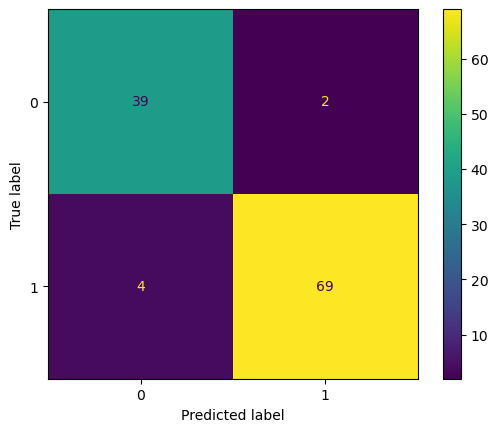

In [11]:
#Matriz de Confusão
con_matrix = confusion_matrix(y_test, predictions)

print(con_matrix)

dist = ConfusionMatrixDisplay(con_matrix)
dist.plot()
plt.show()

# Precisão:   VP/(VP+FP)


Para ilustrar essa métrica, vejamos um exemplo de caso de uso de detecção de spam. Se nosso modelo detectar um e-mail como spam que na verdade não era spam, o usuário pode perder um e-mail importante, ou seja, os falsos positivos devem ser reduzidos aqui. Portanto, neste caso de uso, precisamos usar a precisão como métrica para medir a qualidade do nosso classificador.

In [17]:
# Precisão!
prec = precision_score(y_test, predictions)
print(f"Precisão: {prec}")

Precisão: 0.971830985915493


# Sensibilidade: VP/(VP+FN)

Vejamos um exemplo de caso de uso de previsão de câncer. Considere uma pessoa que realmente tem câncer, mas nosso classificador previu que ela não era um paciente com câncer, o que pode levar a maus-tratos da pessoa, ou seja, os falsos negativos devem ser reduzidos aqui. Então, neste caso, precisamos usar o recall como uma métrica para medir a qualidade do nosso classificador.

In [18]:
# Recall ou Sensibilidade
rec = recall_score(y_test, predictions)
print(f"Recall: {rec}")

Recall: 0.9452054794520548


# F1- Score: VP/(VP+(½)(FP+FN))

In [19]:
# Calculo do F1 score
f1 = f1_score(y_test, predictions)

print(f"F1 Score: {f1}")

F1 Score: 0.9583333333333334


**Curva ROC** 

A curva AUC-ROC é uma métrica de desempenho usada para medir o desempenho do modelo de classificação em diferentes valores de limite. Quanto maior o valor da AUC (Area Under the Curve), melhor será o nosso classificador na previsão das classes. AUC-ROC é usado principalmente em problemas de classificação binária.

A curva ROC é plotada entre a taxa de verdadeiros positivos (TPR) e a taxa de falsos positivos (FPR), ou seja, TPR no eixo y e FPR no eixo y. AUC é a área sob a curva ROC.

Um classificador excelente tem um valor AUC próximo a 1, enquanto um classificador ruim tem um valor AOC próximo a 0. Um classificador com uma pontuação AOC de 0,5 não possui nenhum recurso de separação de classes.

AUC for our classifier is: 0.9769462078182426


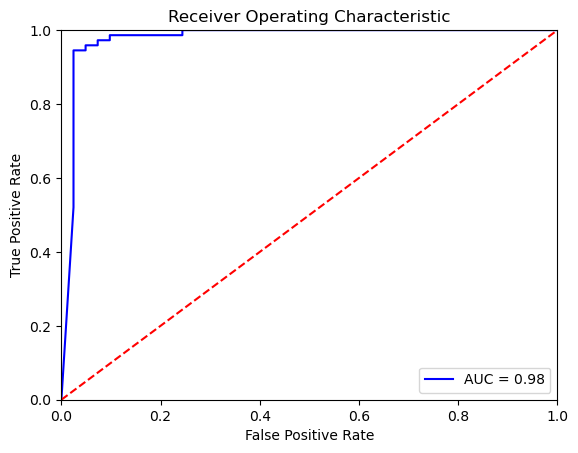

In [15]:
# CURVA - ROC
class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plot da Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# KS

In [20]:
KS = ks_2samp(predictions[predictions == 0], predictions[predictions == 1])
print(f"KS: {round(KS[0],2)*100}")

KS: 100.0
